### This notebook is a walkthrough of how to use extract_faces.py.

You will need to have pliers and its face_recognition dependency installed.
In command line:

This script will read a features.json file that defines the frame sampling rate, the download path, and the save path.
For convenience, this .json file should also include the other parameters you may need for extracting semantic or low-level visual features.

#### Here's an example of what should go in the .json file:


{"hcpmovies": {  
&emsp;      "hdim": 90,                ---> desired horizontal dimension of downsampled image  
&emsp;      "vdim": 128,               ---> desired vertical dimension of downsampled image  
&emsp;      "fps": 24,                 ---> frames per second of the movie
&emsp;      "sd": [0, 90, 180, 270],  ---> spatial directions of gabors (aka motion direction)  
&emsp;      "sf": [0,4],               ---> spatial frequency range for gabors  
&emsp;      "tf": [0,4],               ---> temporal frequency range for gabors  
&emsp;      "samplerate": 1,           ---> the number of frames per second to sample
&emsp;      "downloadpath": "/home/jovyan/shared/hcp-7T_Movies/movie/unzip/Post_20140821_version/", ---> path 2 movies  
&emsp;      "movies": ["7T_MOVIE1_CC1_v2.mp4", ---> list of movie names  
&emsp; &emsp; &emsp; &emsp; &emsp;  "7T_MOVIE2_HO1_v2.mp4",   
&emsp; &emsp; &emsp; &emsp; &emsp;  "7T_MOVIE3_CC2_v2.mp4",   
&emsp; &emsp; &emsp; &emsp; &emsp;  "7T_MOVIE4_HO2_v2.mp4],
&emsp; &emsp; &emsp; &emsp; &emsp;   
&emsp; "savepath": "/home/jovyan/workingdirectory/" ---> where you want to save features  
&emsp; }  
}  

In [2]:
import imageio
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import face_recognition
import pliers
import os
from os.path import join

from pliers.stimuli import VideoStim
from pliers.graph import Graph
from pliers.filters import FrameSamplingFilter
#from pliers.extractors import (FaceRecognitionFaceLocationsExtractor,
                               #FaceRecognitionFaceEncodingsExtractor,
                               #MicrosoftAPIFaceExtractor,
                               #GoogleVisionAPIFaceExtractor,
                               #merge_results)
from pliers.extractors import (FaceRecognitionFaceLocationsExtractor,
                               FaceRecognitionFaceEncodingsExtractor,
                               merge_results)

from pliers.converters import VideoToAudioConverter

2023-08-17 19:19:08.529929: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In python notebook: 

In [3]:
pliers.utils.attempt_to_import('face_recognition')

<module 'face_recognition' from '/srv/conda/envs/notebook/lib/python3.10/site-packages/face_recognition/__init__.py'>

In [17]:
face_recognition.api

<module 'face_recognition.api' from '/srv/conda/envs/notebook/lib/python3.10/site-packages/face_recognition/api.py'>

In [4]:
# Save the video to be analyzed into a variable.
video = VideoStim(r'/home/jovyan/hackathon/visual-feature-decoding/extract_features/extract_faces/video_clips/Discussion Stock Footage - Discussion Free Stock Videos - Discussion No Copyright Videos (480p).mp4')
#    AHH: This is currently hardcoded to my jupyterhub file path where the video to analyze is saved.

In [5]:
# This is sampling at the rate of 1 Hz (1 frame per sec). 
#    AHH: This step takes a while, but is quicker the more you downsample. 
sampler = FrameSamplingFilter(hertz=1)
frames = sampler.transform(video)

In [6]:
# Detect faces in selected frames
face_ext = FaceRecognitionFaceLocationsExtractor()
# face_ext = FaceRecognitionFaceEncodingsExtractor() # AHH - need to figure out how EncodingsExtractor differs from LocationsExtractor
face_result = face_ext.transform(frames)

Stim: 343it [03:20,  1.71it/s]


In [7]:
# AHH: Let's just look at the results...
result_df = [f.to_df() for f in face_result]

result_df = pd.concat(result_df)

result_df.head(10)

# This df contains sample duration, onset of sample, id of detected face, and coordinates for the bounding box of a detected face, in pixels

,order,duration,onset,object_id,face_locations
0,NaN,1.0,16.0,0,"(68, 354, 175, 247)"
1,NaN,1.0,16.0,1,"(92, 581, 199, 474)"
0,NaN,1.0,17.0,0,"(76, 344, 166, 255)"
1,NaN,1.0,17.0,1,"(92, 581, 199, 474)"
0,NaN,1.0,18.0,0,"(86, 335, 176, 245)"
1,NaN,1.0,18.0,1,"(92, 581, 199, 474)"
0,NaN,1.0,19.0,0,"(86, 325, 176, 235)"
1,NaN,1.0,19.0,1,"(80, 593, 187, 485)"
0,NaN,1.0,20.0,0,"(56, 629, 163, 521)"
1,NaN,1.0,20.0,1,"(86, 335, 176, 245)"


In [8]:
import numpy as np
# Set the range of time over which to plot extracted faces.
#     AHH: Again, this needs to be manually set currently. Maybe set the range automatically based on the number of frames given the sampling Hz...?
#     Total s = number of frames / Hz
time = np.arange(0,342,0.5)

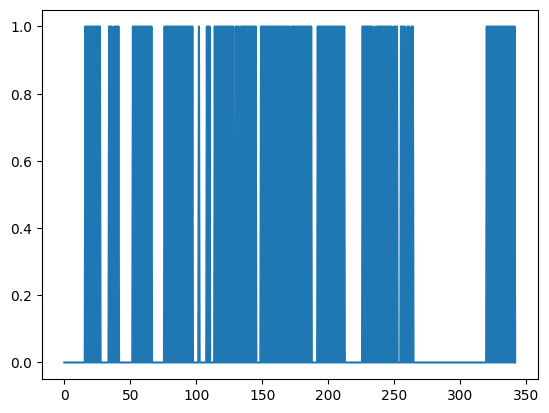

In [9]:
# AHH: I'm pretty sure all this is doing is plotting whether a face is present or not at each sampled frame.
# Plotting location or whatever face_encoding is tracking could be more interesting!
plt.plot(time, [t in result_df["onset"].values for t in time])